<a href="https://colab.research.google.com/github/Shuregg/dsp-labs/blob/lab4-filters/DSP_lab4_filters_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основное задание

## 2.1 Синтез частотно-избирательных КИХ-фильтров оконным методом


### 1. Сформировать идеальные частотные характеристики КИХ-фильтра, согласно параметрам по варианту. Количество отсчетов взять достаточно большим (N > 1000).

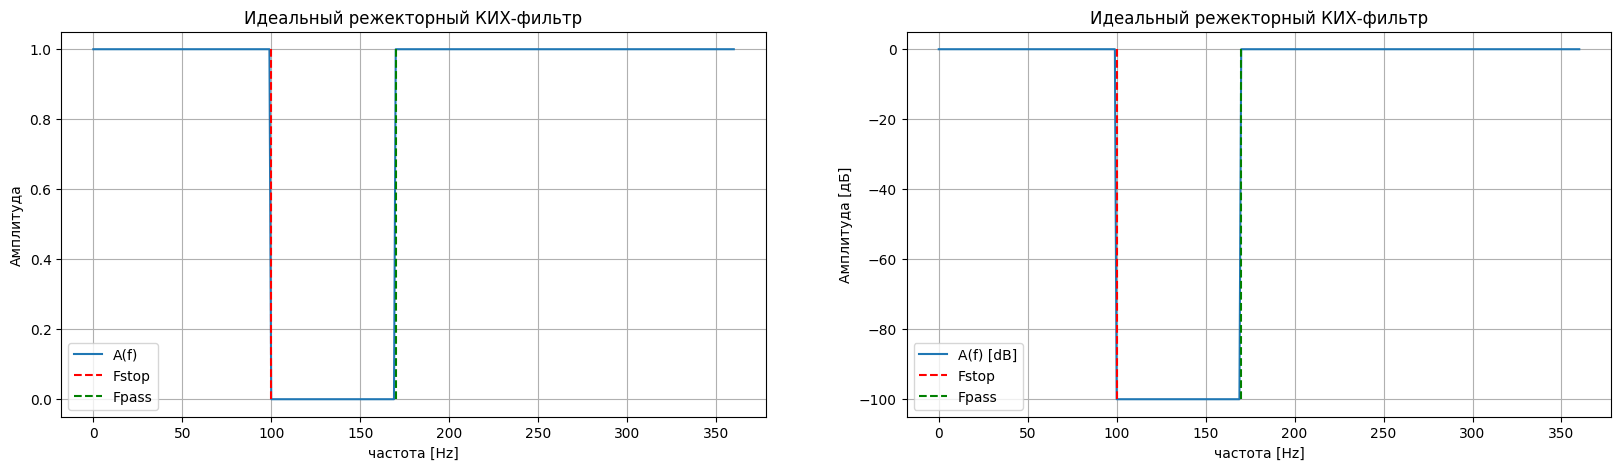

In [610]:
import numpy as np
from scipy.signal import firwin2, freqz, windows
import matplotlib.pyplot as plt

# Rejection filter (bandstop)
# Window type: blackman
variant = 12
fs = 720        # Hz
f0 = 150        # Hz
Fstop = 100     # Hz
Fpass = 170     # Hz
order = 22      # filter order
fn = int(fs/2)

# Параметры фильтра
N = 7200

Nf = order + 1  # Количество коэффициентов фильтра (порядок фильтра + 1)

band_pass0 = np.linspace(0, Fstop, Fstop*10, endpoint=False, dtype=np.int32)
band_stop  = np.linspace(Fstop, Fpass, (Fpass-Fstop)*10, endpoint=False, dtype=np.int32)
band_pass1 = np.linspace(Fpass, (int(fs/2)), (int(fs/2)-Fpass)*10, endpoint=True, dtype=np.int32)

test_freqs = np.concatenate((band_pass0, band_stop, band_pass1), dtype=np.int32)

test_gains = []
for i in range(len(test_freqs)):
  if(0 <= test_freqs[i] and test_freqs[i] < Fstop):
    test_gains.append(1)
  elif(Fstop <= test_freqs[i] and test_freqs[i] < Fpass):
    test_gains.append(0 + 1 * 10 ** (-5))
  elif(Fpass <= test_freqs[i] and test_freqs[i] <= (fs/2)):
    test_gains.append(1)
  else:
    test_gains.append(0)

# print(f'test_freqs =\n{test_freqs}')
# print(f'test_gains =\n{test_gains}')

perf_filt_freq = test_freqs

perf_filt_freq_full = np.linspace(0, fs, fs*10, endpoint=True)

perf_filt_amp = test_gains
perf_filt_amp_rev = perf_filt_amp.copy()
perf_filt_amp_rev.reverse()

perf_filt_amp_double = (perf_filt_amp + perf_filt_amp_rev)

plt.figure( figsize=(20, 5))
plt.subplot(121)
plt.plot(perf_filt_freq, perf_filt_amp, label='A(f)')
plt.plot( 2*[Fstop], [0,1], 'r--', label='Fstop')
plt.plot( 2*[Fpass], [0,1], 'g--', label='Fpass')
plt.title("Идеальный режекторный КИХ-фильтр")
plt.xlabel('частота [Hz]')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.plot(perf_filt_freq, 20*np.log10(perf_filt_amp), label='A(f) [dB]')
plt.plot( 2*[Fstop], [0,-100], 'r--', label='Fstop')
plt.plot( 2*[Fpass], [0,-100], 'g--', label='Fpass')
plt.title("Идеальный режекторный КИХ-фильтр")
plt.xlabel('частота [Hz]')
plt.ylabel('Амплитуда [дБ]')
plt.grid(True)
plt.legend()


# plt.figure( figsize=(20, 5))
# plt.subplot(121)
# plt.plot(perf_filt_freq_full, perf_filt_amp_double, label='A(f)')
# plt.plot( 2*[fn], [0,1], 'k--', label='fn')
# plt.title("Идеальный режекторный КИХ-фильтр")
# plt.xlabel('частота [Hz]')
# plt.ylabel('Амплитуда')
# plt.grid(True)
# plt.legend()

# # plt.plot( 2*[Fstop / fn], [0,1], 'r--')
# # plt.plot( 2*[Fpass / fn], [0,1], 'g--')
# plt.subplot(122)
# plt.plot(perf_filt_freq_full, 20*np.log10(perf_filt_amp_double), label='A(f) [dB]')
# plt.title("Идеальный режекторный КИХ-фильтр")
# plt.plot( 2*[fn], [0,-100], 'k--', label='fn')
# plt.xlabel('Нормированная частота')
# plt.ylabel('Амплитуда [дБ]')
# plt.grid(True)
# plt.legend()

# print(20*np.log10(test_gains))

###2. Получить идеальную импульсную характеристику фильтра, применив ОБПФ к идеальной частотной характеристике фильтра.


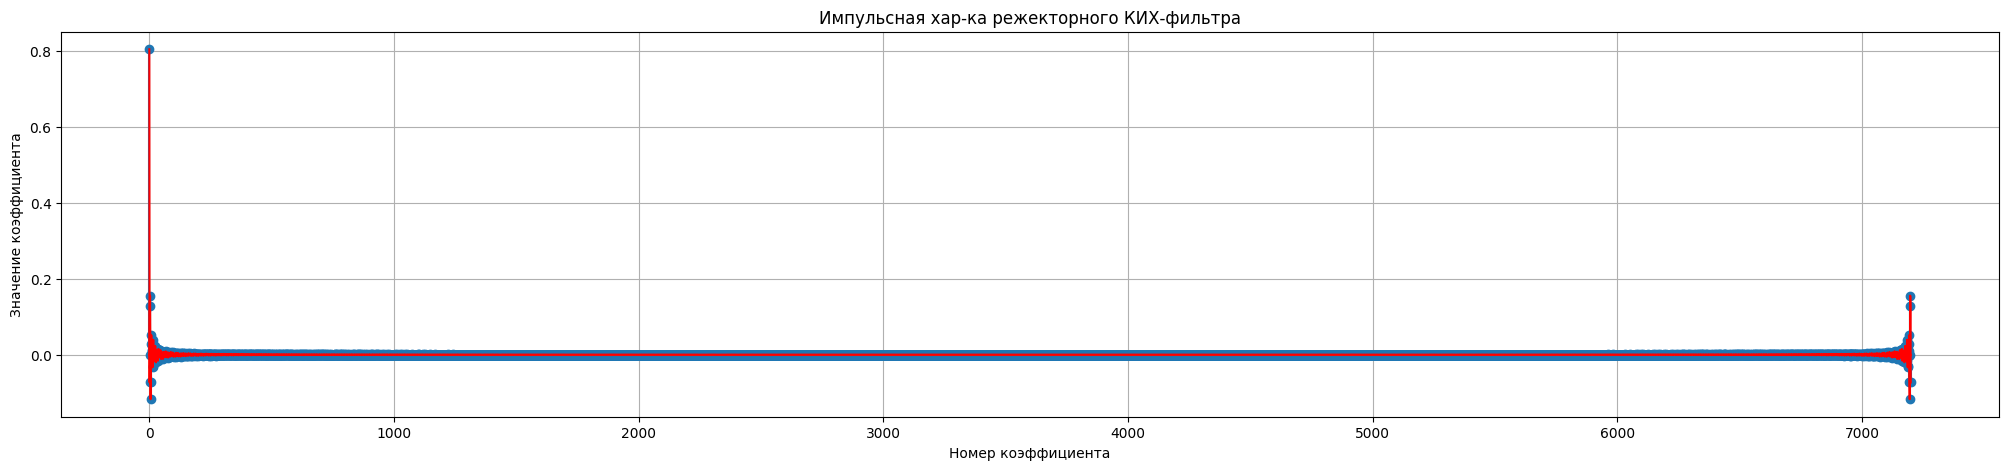

In [611]:
# from scipy.fftpack import fft, fftfreq, ifft
# # FOR my filter
# perf_filt_impulse = ifft(perf_filt_amp)
# plt.figure( figsize=(25, 5))
# plt.stem(perf_filt_impulse)
# plt.title('Импульсная хар-ка режекторного КИХ-фильтра')
# plt.xlabel('Номер коэффициента')
# plt.ylabel('Значение коэффициента')
# plt.grid(True)

from scipy.fftpack import fft, fftfreq, ifft
# FOR my filter
perf_filt_impulse = np.real(ifft(perf_filt_amp_double))
plt.figure( figsize=(25, 5))
plt.stem(perf_filt_impulse)
plt.plot(perf_filt_impulse, 'r-')

plt.title('Импульсная хар-ка режекторного КИХ-фильтра')
plt.xlabel('Номер коэффициента')
plt.ylabel('Значение коэффициента')
plt.grid(True)


# FOR scipy.signal filter
# # ideal_impulse = ifft(abs(h))

# filter_coefs_ideal = firwin2(num_coefs[0], test_freqs, test_gains, fs=fs, window=window_types[0])
# # Анализ характеристик фильтра
# w_ideal, h_ideal = freqz(filter_coefs_ideal)
# absh = abs(h_ideal)
# absh_ifft = ifft(absh)
# # print(f'impulse_cut =\n{impulse_cut}')
# # print(f'len(h) = {len(h)},\nh =\n{h}')
# # print(f'len(ideal_impulse) = {len(ideal_impulse)},\nideal_impulse =\n{ideal_impulse}')
# plt.figure( figsize=(25, 5))
# plt.stem(absh_ifft)
# plt.title('Импульсная характеристика КИХ-РФ')
# plt.xlabel('Номер коэффициента')
# plt.ylabel('Значение коэффициента')
# plt.grid(True)

###3. Сделать "усечение" идеальной импульсной характеристики до размера, равного порядку фильтра + 1. Это необходимо сделать таким образом, чтобы в импульсной характеристике остались значимые отсчеты: нулевой отсчет, отсчетов из отрицательной области и отсчетов из положительной области (подобно тому, как мы это делали в лабораторной работе №2 в задании с комплексной гармонической вырезкой).


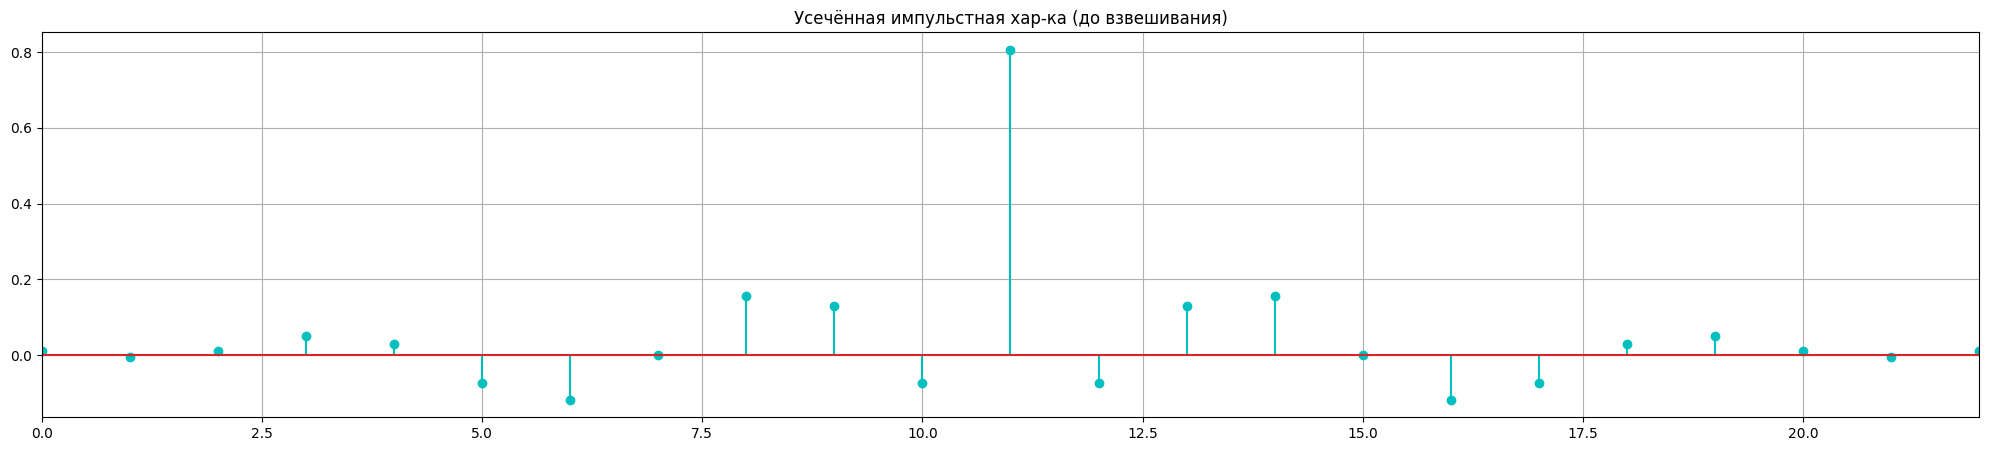

In [612]:
nf = np.linspace( 0, Nf,  Nf, endpoint=False )
impulse_cut = np.zeros(Nf)

# NN = len(perf_filt_amp)
impulse_cut[0:int(Nf /2)] = perf_filt_impulse[N-int(Nf/2):N]
impulse_cut[int(Nf /2):Nf] = perf_filt_impulse[0:int(np.ceil(Nf/2))]
plt.figure(figsize=[25,5])
plt.title( 'Усечённая импульстная хар-ка (до взвешивания)' )
plt.stem( nf, impulse_cut , 'c')
plt.xlim( [0, Nf-1] )
plt.grid( True )



# # FOR my filter
# imp_len = len(perf_filt_impulse)
# Nf_h = int((Nf-1)/2)
# perf_filt_cut = np.concatenate((perf_filt_impulse[0 : Nf_h + 1], np.zeros(imp_len - Nf), perf_filt_impulse[imp_len - Nf_h : imp_len]))

# plt.figure( figsize=(25, 5))
# plt.stem(perf_filt_cut)
# plt.title('Усеченная имп. хар-ка режекторного КИХ-фильтра')
# plt.xlabel('Номер коэффициента')
# plt.ylabel('Значение коэффициента')
# plt.grid(True)

# FOR scipy.signal filter
# # print(h)
# # absh = h
# absh = abs(h_ideal)

# imp_len = len(abs(h_ideal))
# Nf_h = int((Nf-1)/2)

# impulse_cut = np.concatenate((absh[0 : Nf_h + 1], np.zeros(imp_len - Nf), absh[imp_len - Nf_h : imp_len]))
# print(f'len(impulse_cut) = {len(impulse_cut)}')
# # impulse_cut_ifft = ifft(impulse_cut)
# # print(impulse_cut)
# plt.figure( figsize=(25, 5))
# plt.stem(impulse_cut)
# plt.title('Усеченная импульсная характеристика КИХ-РФ')
# plt.xlabel('Номер коэффициента')
# plt.ylabel('Значение коэффициента')
# plt.grid(True)

###4. Построить частотные характеристики фильтра, соответствующие усеченной импульсной характеристике.


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Амплитуда [дБ]')

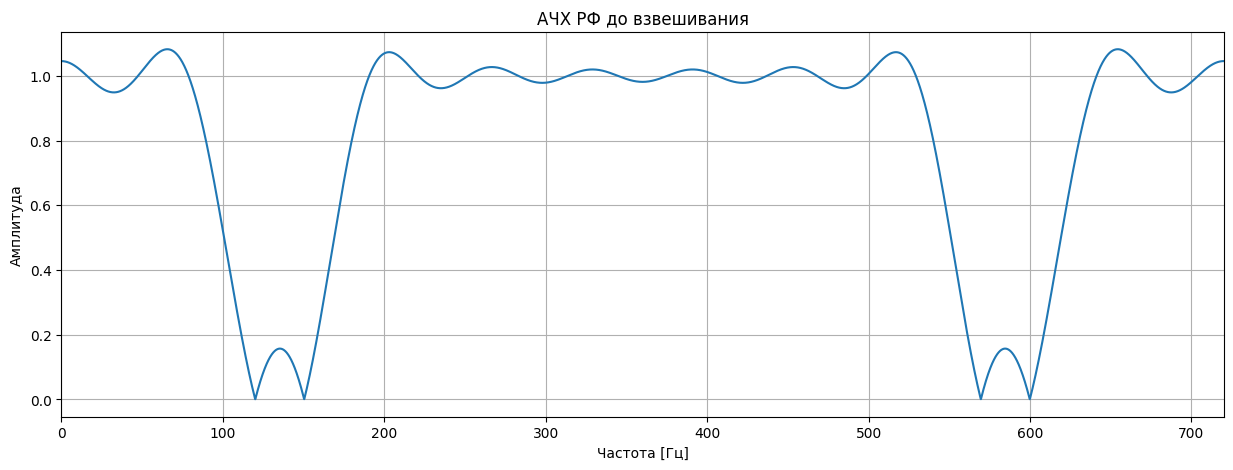

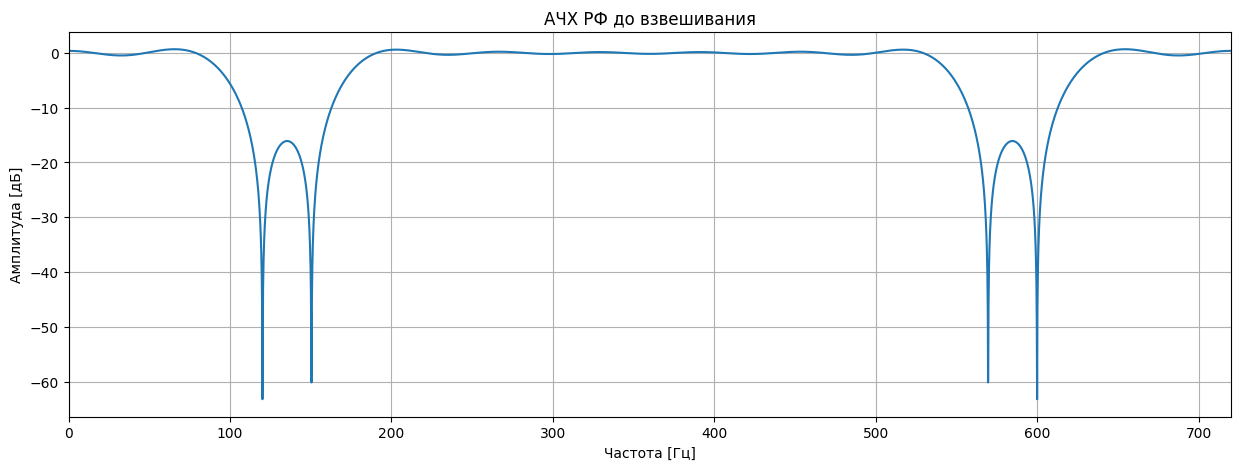

In [613]:
w_cut, h_cut = freqz(impulse_cut, worN=N, fs=fs, whole=True)

plt.figure(figsize=[15, 5])
plt.title('АЧХ РФ до взвешивания')
plt.plot(w_cut, abs(h_cut))
# plt.plot( 2*[Fstop], [np.min(abs(h)), np.max(abs(h))], 'r--', label='Fstop')
# plt.plot( 2*[Fpass], [np.min(abs(h)), np.max(abs(h))], 'g--', label='Fpass')
plt.xlim([0, fs])
plt.grid(True)
plt.xlabel('Частота [Гц]')
plt.ylabel('Амплитуда')

plt.figure(figsize=[15, 5])
plt.title('АЧХ РФ до взвешивания')
plt.plot(w_cut, 20*np.log10(h_cut))
# plt.plot( 2*[Fstop], [np.max(20*np.log10(h)), np.min(20*np.log10(h))], 'r--', label='Fstop')
# plt.plot( 2*[Fpass], [np.max(20*np.log10(h)), np.min(20*np.log10(h))], 'g--', label='Fpass')
plt.xlim([0, fs])
plt.grid(True)
plt.xlabel('Частота [Гц]')
plt.ylabel('Амплитуда [дБ]')
# # ideal_impulse = ifft(abs(h))

# # Анализ характеристик фильтра
# w_cut, h_cut = freqz(impulse_cut)
# absh_cut = abs(h_cut)
# absh_cut_ifft = ifft(absh_cut)
# # print(f'impulse_cut =\n{impulse_cut}')
# # print(f'len(h) = {len(h)},\nh =\n{h}')
# # print(f'len(ideal_impulse) = {len(ideal_impulse)},\nideal_impulse =\n{ideal_impulse}')
# plt.figure( figsize=(25, 5))
# plt.stem(absh_cut_ifft)
# plt.title('Импульсная характеристика КИХ-РФ')
# plt.xlabel('Номер коэффициента')
# plt.ylabel('Значение коэффициента')
# plt.grid(True)

###5. Применить оконную функцию к импульсной характеристике (взвешивание). Для этого усеченную импульсную характеристику необходимо поэлементно умножить на массив соответствующей оконной функции нужного размера. Изобразить на графике усеченную импульсную характеристику фильтра до и после взвешивания, а также саму оконную функцию.


weights of blackman window (rounded):
[-0.    0.01  0.03  0.07  0.14  0.24  0.37  0.53  0.68  0.82  0.93  0.99
  0.99  0.93  0.82  0.68  0.53  0.37  0.24  0.14  0.07  0.03  0.01]


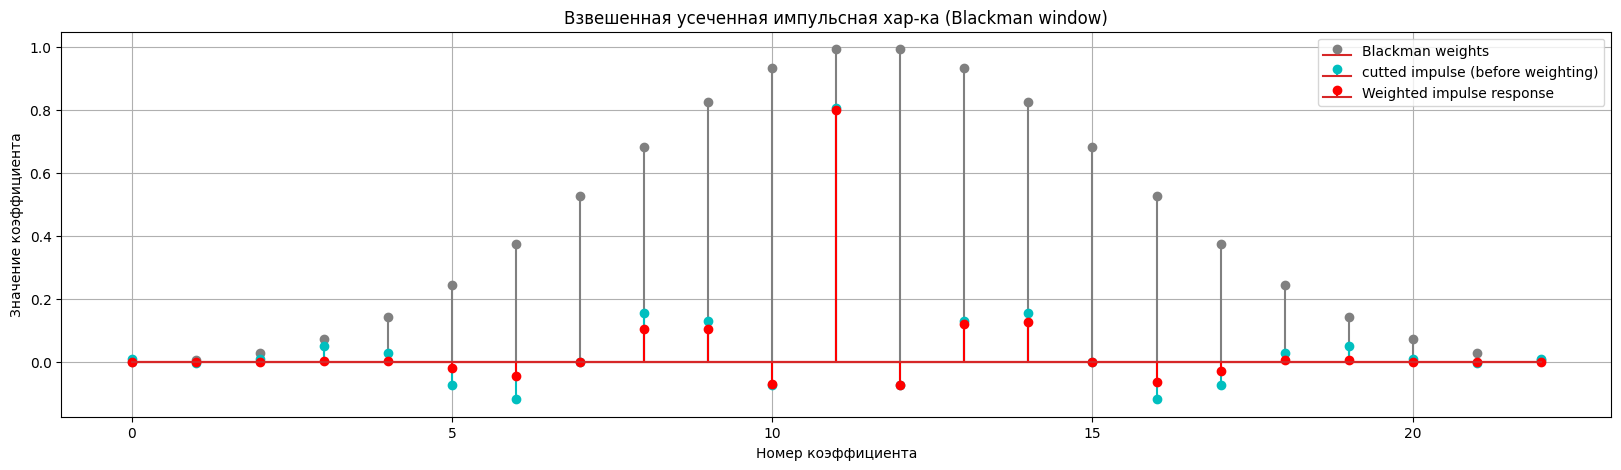

In [614]:
# # w = 0.42 + 0.5 ⁎ np.cos([-M:1:M] ⁎ np.pi/M)+0.08 ⁎ np.cos(2 ⁎ [-M:1:M] ⁎ np.pi/M)
# # w = a0 - a1 * np.cos((2 * np.pi * n) / N) + a2 * np.cos((4 * np.pi * n) / N)
def blackman_window(N):
  alpha = 0.16
  a0 = (1 - alpha) / 2
  a1 = 1/2
  a2 = alpha / 2
  w_list = []
  for n in range(N):
    weight = a0 - a1 * np.cos((2 * np.pi * n) / N) + a2 * np.cos((4 * np.pi * n) / N)
    w_list.append(weight)
  return w_list

def list_mul_elements(list1, list2):
  res = []
  if(len(list1) != len(list2)):
    print(f'length are not equal!')
  else:
    for i in range(len(list1)):
      res.append(list1[i] * list2[i])
    return res

blackman_weights = blackman_window(len(impulse_cut))
print(f'weights of blackman window (rounded):\n{np.round(blackman_weights, 2)}')

weighted_impulse = impulse_cut * blackman_weights
# print(f'weighted impulse:\n{weighted_amp}')


plt.figure(figsize=(20, 5))
plt.stem(blackman_weights, 'grey', label='Blackman weights')
plt.stem(impulse_cut, 'c', label='cutted impulse (before weighting)')
plt.stem(weighted_impulse, 'r', label='Weighted impulse response')
plt.title('Взвешенная усеченная импульсная хар-ка (Blackman window)')
plt.xlabel('Номер коэффициента')
plt.ylabel('Значение коэффициента')
plt.legend()
plt.grid(True)

# # # from scipy.signal import blackman
# # from scipy.signal.windows import blackman

# # # Размер окна равен размеру усеченной импульсной характеристики
# # window_size = len(impulse_cut)

# # # Создаем оконную функцию Blackman нужного размера
# # window = blackman(window_size)

# # # Умножаем усеченную импульсную характеристику на оконную функцию
# # weighted_impulse_response = impulse_cut * window

# # # Изображаем усеченную импульсную характеристику фильтра до и после взвешивания, а также оконную функцию
# # plt.figure(figsize=(12, 6))

# # plt.subplot(311)
# # plt.plot(impulse_cut, marker='o', label='Импульсная характеристика\n до взвешивания')
# # plt.xlabel('Отсчеты')
# # plt.ylabel('Амплитуда')
# # plt.legend(loc='upper center')
# # plt.grid(True)


# # plt.subplot(312)
# # plt.plot(window, label='Оконная функция Blackman')
# # plt.xlabel('Отсчеты')
# # plt.ylabel('Амплитуда')
# # plt.legend(loc='upper right')
# # plt.grid(True)

# # plt.subplot(313)
# # plt.plot(weighted_impulse_response, marker='o', label='Импульсная характеристика после взвешивания')
# # plt.xlabel('Отсчеты')
# # plt.ylabel('Амплитуда')
# # plt.legend(loc='upper center')
# # plt.grid(True)

# # plt.tight_layout()
# # plt.show()

###6. Построить частотные характеристики фильтра, соответствующие усеченной взвешенной импульсной характеристике. Проанализировать результаты и сделать выводы.

Text(0, 0.5, 'Амплитуда [дБ]')

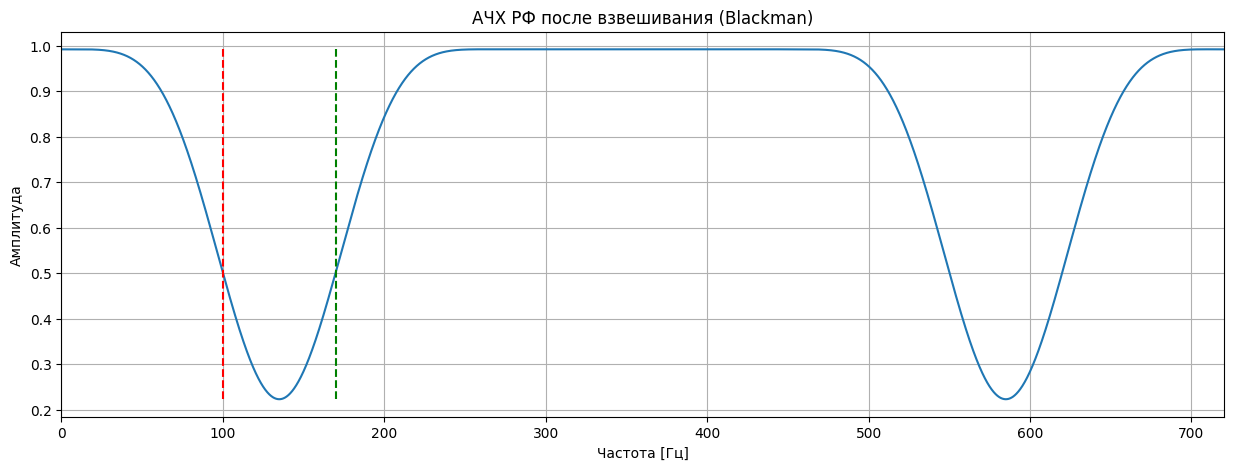

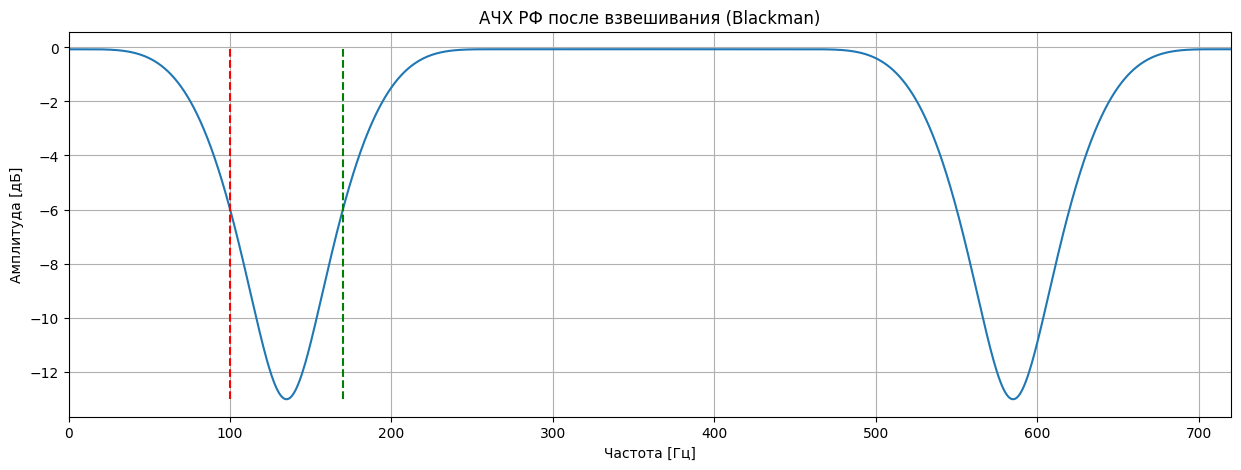

In [615]:
w_weighted, h_weighted = freqz(weighted_impulse, worN=N, fs=fs, whole=True)

plt.figure(figsize=[15, 5])
plt.title('АЧХ РФ после взвешивания (Blackman)')
plt.plot(w_weighted, abs(h_weighted))
plt.plot( 2*[Fstop], [np.min(abs(h_weighted)), np.max(abs(h_weighted))], 'r--', label='Fstop')
plt.plot( 2*[Fpass], [np.min(abs(h_weighted)), np.max(abs(h_weighted))], 'g--', label='Fpass')
plt.xlim([0, fs])
plt.grid(True)
plt.xlabel('Частота [Гц]')
plt.ylabel('Амплитуда')

plt.figure(figsize=[15, 5])
plt.title('АЧХ РФ после взвешивания (Blackman)')
plt.plot(w_weighted, 20*np.log10(h_weighted))
plt.plot( 2*[Fstop], [np.max(20*np.log10(h_weighted)), np.min(20*np.log10(h_weighted))], 'r--', label='Fstop')
plt.plot( 2*[Fpass], [np.max(20*np.log10(h_weighted)), np.min(20*np.log10(h_weighted))], 'g--', label='Fpass')
plt.xlim([0, fs])
plt.grid(True)
plt.xlabel('Частота [Гц]')
plt.ylabel('Амплитуда [дБ]')

# # Создадим усеченную импульсную характеристику фильтра
# filter_coefs_ideal_weighted = firwin2(num_coefs[0], test_freqs, test_gains, fs=fs, window='blackman')
# # Анализ характеристик фильтра
# w_ideal, h_ideal = freqz(filter_coefs_ideal_weighted)
# absh = abs(h_ideal)
# absh_ifft = ifft(absh)

# # Размер окна равен размеру усеченной импульсной характеристики
# window_size = len(impulse_cut)

# # Создадим оконную функцию Blackman нужного размера
# window = blackman(window_size)

# # Умножим усеченную импульсную характеристику на оконную функцию
# weighted_impulse_response = impulse_cut * window

# # Получим частотную характеристику фильтра соответствующую импульсной характеристике
# freq_response = fft(weighted_impulse_response)

# # Построим график модуля частотной характеристики фильтра
# plt.figure(figsize=(8, 6))
# plt.plot(np.abs(freq_response), label='Модуль частотной характеристики фильтра')
# plt.axvline(x=Fstop, color='r', linestyle='--', label='Частота заграждения')
# plt.axvline(x=Fpass, color='g', linestyle='--', label='Частота пропускания')
# plt.xlabel('Частота')
# plt.ylabel('Амплитуда')
# plt.legend()
# plt.grid()
# plt.show()

###7. Изучить возможности пакета scipy.signal.firwin2 для задачи синтеза КИХ-фильтра оконным методом. Синтезировать фильтр, используя функцию firwin2.


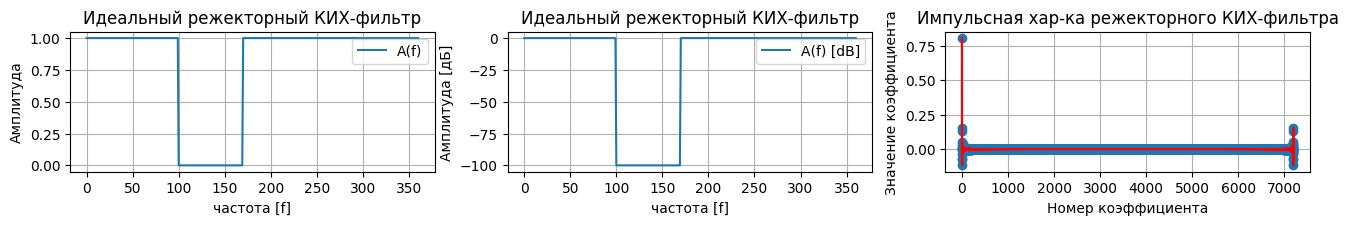

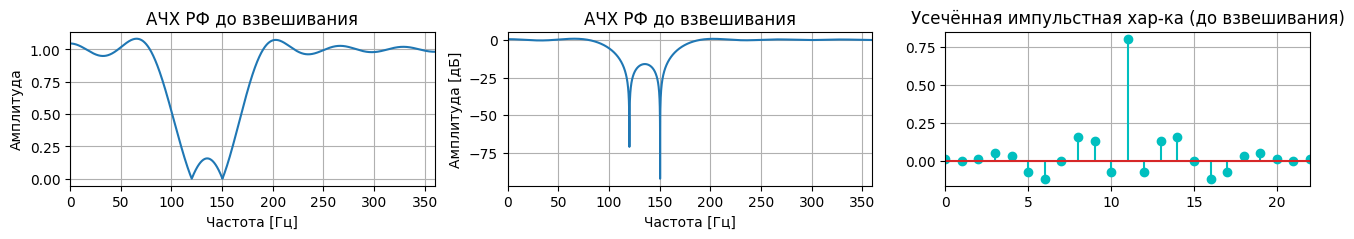

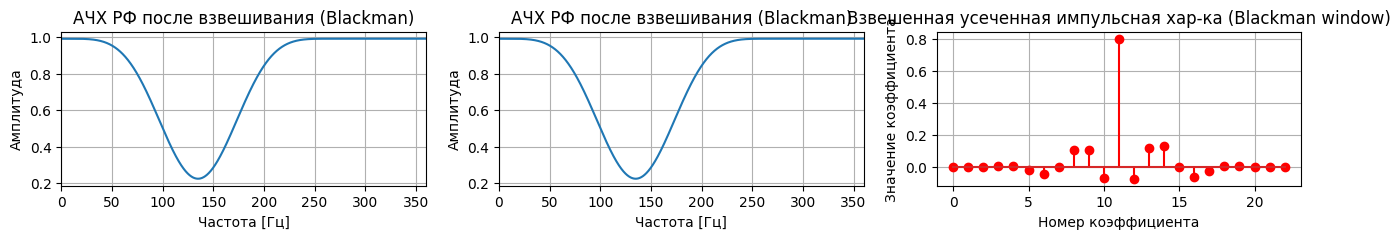

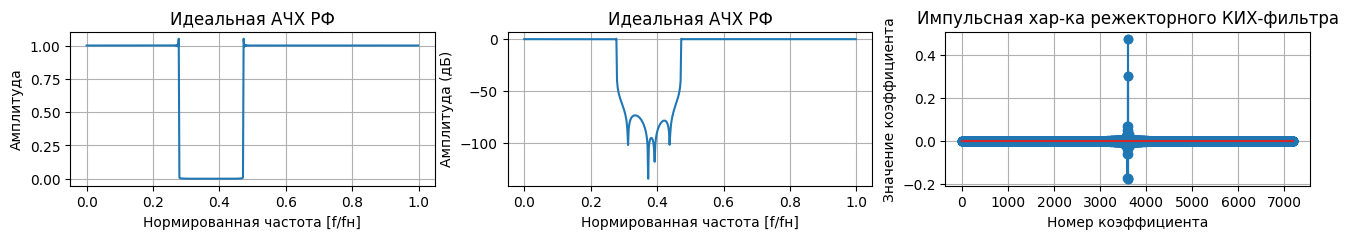

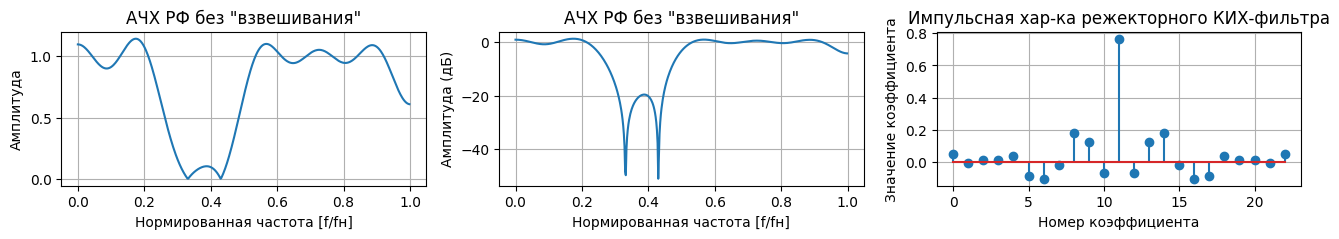

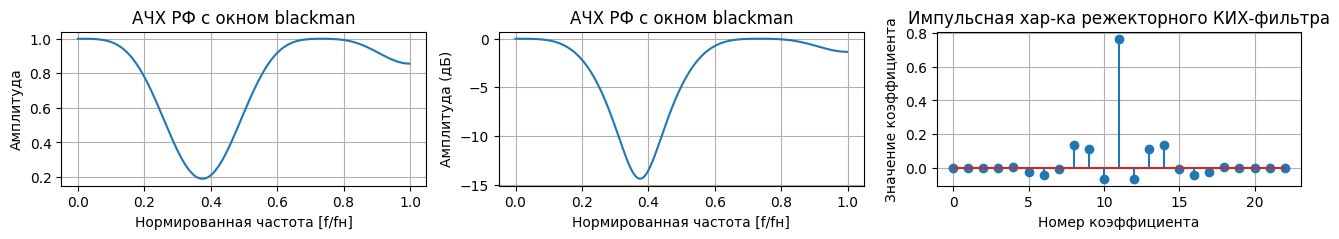

In [616]:
window_types = ['boxcar', 'boxcar', 'blackman']
num_coefs = [N, Nf, Nf]
titles = ['Идеальная АЧХ РФ', 'АЧХ РФ без "взвешивания"', 'АЧХ РФ с окном blackman']

# МОЯ РЕАЛИЗАЦИЯ
# ------------------------------------------------------------------------------
# Хар-ка идеального фильтра
plt.figure(figsize=(16, 4))
plt.subplot(231)
plt.plot(perf_filt_freq, perf_filt_amp, label='A(f)')
# plt.plot( 2*[Fstop], [0,1], 'r--', label='Fstop')
# plt.plot( 2*[Fpass], [0,1], 'g--', label='Fpass')
plt.title("Идеальный режекторный КИХ-фильтр")
plt.xlabel('частота [f]')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.legend()

# # Создание режекторного FIR-фильтра
# filter_coefs = firwin2(num_coefs[0], freqs, gains, fs=fs, window=window_types[0])
# # print(f'i = {i}')
# # Анализ характеристик фильтра
# w, h = freqz(filter_coefs)
# # print(f'h=\n{h}')
# # print(f'|h|=\n{abs(h)}')
# # Визуализация амплитудной характеристики фильтра
# plt.plot(w/np.pi, abs(h))
# plt.title(titles[0])
# plt.xlabel('Нормированная частота [f/fн]')
# plt.ylabel('Амплитуда')
# plt.grid(True)
# ------------------------------------------------------------------------------
# Хар-ка идеального фильтра [дБ]
plt.subplot(232)
plt.plot(perf_filt_freq, 20*np.log10(perf_filt_amp), label='A(f) [dB]')
# plt.plot( 2*[Fstop], [0,-100], 'r--', label='Fstop')
# plt.plot( 2*[Fpass], [0,-100], 'g--', label='Fpass')
plt.title("Идеальный режекторный КИХ-фильтр")
plt.xlabel('частота [f]')
plt.ylabel('Амплитуда [дБ]')
plt.grid(True)
plt.legend()

# # Визуализация амплитудной характеристики фильтра (логарифмический масштаб)
# plt.plot(w/np.pi, 20 * np.log10(abs(h)))
# plt.title(titles[0])
# plt.xlabel('Нормированная частота [f/fн]')
# plt.ylabel('Амплитуда (дБ)')
# plt.grid(True)
# ------------------------------------------------------------------------------
# Импульсная хар-ка идеального фильтра
plt.subplot(233)
plt.stem(perf_filt_impulse)
plt.plot(perf_filt_impulse, 'r-')
plt.title('Импульсная хар-ка режекторного КИХ-фильтра')
plt.xlabel('Номер коэффициента')
plt.ylabel('Значение коэффициента')
plt.grid(True)

# plt.stem(filter_coefs)
# plt.title('Импульсная хар-ка режекторного КИХ-фильтра')
# plt.xlabel('Номер коэффициента')
# plt.ylabel('Значение коэффициента')
# plt.grid(True)
# plt.show()
# print()

# ==============================================================================

w_cut2, h_cut2 = freqz(impulse_cut, worN=N, fs=fs, whole=False)
plt.figure(figsize=(16, 2))
plt.subplot(131)
plt.title('АЧХ РФ до взвешивания')
plt.plot(w_cut2, abs(h_cut2))
# plt.plot( 2*[Fstop], [np.min(abs(h)), np.max(abs(h))], 'r--', label='Fstop')
# plt.plot( 2*[Fpass], [np.min(abs(h)), np.max(abs(h))], 'g--', label='Fpass')
plt.xlim([0, fs/2])
plt.grid(True)
plt.xlabel('Частота [Гц]')
plt.ylabel('Амплитуда')

# # Создание режекторного FIR-фильтра
# filter_coefs = firwin2(num_coefs[1], freqs, gains, fs=fs, window=window_types[1])
# # print(f'i = {i}')
# # Анализ характеристик фильтра
# w, h = freqz(filter_coefs)
# print(f'h=\n{h}')
# print(f'|h|=\n{abs(h)}')
# # Визуализация амплитудной характеристики фильтра
# plt.plot(w/np.pi, abs(h))
# plt.title(titles[1])
# plt.xlabel('Нормированная частота [f/fн]')
# plt.ylabel('Амплитуда')
# plt.grid(True)
# ------------------------------------------------------------------------------
plt.subplot(132)
plt.title('АЧХ РФ до взвешивания')
plt.plot(w_cut2, 20*np.log10(h_cut2))
# plt.plot( 2*[Fstop], [np.max(20*np.log10(h)), np.min(20*np.log10(h))], 'r--', label='Fstop')
# plt.plot( 2*[Fpass], [np.max(20*np.log10(h)), np.min(20*np.log10(h))], 'g--', label='Fpass')
plt.xlim([0, fs/2])
plt.grid(True)
plt.xlabel('Частота [Гц]')
plt.ylabel('Амплитуда [дБ]')

# # Визуализация амплитудной характеристики фильтра (логарифмический масштаб)
# plt.plot(w/np.pi, 20 * np.log10(abs(h)))
# plt.title(titles[1])
# plt.xlabel('Нормированная частота [f/fн]')
# plt.ylabel('Амплитуда (дБ)')
# plt.grid(True)
# ------------------------------------------------------------------------------
plt.subplot(133)
plt.title( 'Усечённая импульстная хар-ка (до взвешивания)' )
plt.stem( nf, impulse_cut , 'c')
plt.xlim( [0, Nf-1] )
plt.grid( True )

# # Визуализация импульсной характеристики фильтра
# plt.stem(filter_coefs)
# plt.title('Импульсная хар-ка режекторного КИХ-фильтра')
# plt.xlabel('Номер коэффициента')
# plt.ylabel('Значение коэффициента')
# plt.grid(True)
# plt.show()
# print()
# ==============================================================================
w_weighted2, h_weighted2 = freqz(weighted_impulse, worN=N, fs=fs, whole=False)
plt.figure(figsize=(16, 2))
plt.subplot(131)
plt.title('АЧХ РФ после взвешивания (Blackman)')
plt.plot(w_weighted2, abs(h_weighted2))
# plt.plot( 2*[Fstop], [np.min(abs(h_weighted2)), np.max(abs(h_weighted2))], 'r--', label='Fstop')
# plt.plot( 2*[Fpass], [np.min(abs(h_weighted2)), np.max(abs(h_weighted2))], 'g--', label='Fpass')
plt.xlim([0, fs/2])
plt.grid(True)
plt.xlabel('Частота [Гц]')
plt.ylabel('Амплитуда')

# ------------------------------------------------------------------------------
plt.subplot(132)
plt.title('АЧХ РФ после взвешивания (Blackman)')
plt.plot(w_weighted2, abs(h_weighted2))
# plt.plot( 2*[Fstop], [np.min(abs(h_weighted2)), np.max(abs(h_weighted2))], 'r--', label='Fstop')
# plt.plot( 2*[Fpass], [np.min(abs(h_weighted2)), np.max(abs(h_weighted2))], 'g--', label='Fpass')
plt.xlim([0, fs/2])
plt.grid(True)
plt.xlabel('Частота [Гц]')
plt.ylabel('Амплитуда')
# ------------------------------------------------------------------------------
plt.subplot(133)
# plt.stem(blackman_weights, 'grey', label='Blackman weights')
# plt.stem(impulse_cut, 'c', label='cutted impulse (before weighting)')
plt.stem(weighted_impulse, 'r', label='Weighted impulse response')
plt.title('Взвешенная усеченная импульсная хар-ка (Blackman window)')
plt.xlabel('Номер коэффициента')
plt.ylabel('Значение коэффициента')
# plt.legend()
plt.grid(True)
# ==============================================================================

# Определяем точки разделения частот для режекторного фильтра
freqs = [0, Fstop-0.1, Fstop, Fpass, Fpass+0.1, (fs/2)-0.1, fs/2]
# Задаем желаемый уровень амплитуды для каждой полосы частот
gains = [1, 1, 0, 0, 1, 1, 0]

print()
for i in range(0, len(window_types)):

    # Создание режекторного FIR-фильтра
    filter_coefs = firwin2(num_coefs[i], freqs, gains, fs=fs, window=window_types[i])
    # print(f'i = {i}')

    # Анализ характеристик фильтра
    w, h = freqz(filter_coefs)
    # print(f'h=\n{h}')
    # print(f'|h|=\n{abs(h)}')

    # Визуализация амплитудной характеристики фильтра
    plt.figure(figsize=(16, 2))
    plt.subplot(1,3,1)
    plt.plot(w/np.pi, abs(h))
    plt.title(titles[i])
    plt.xlabel('Нормированная частота [f/fн]')
    plt.ylabel('Амплитуда')
    plt.grid(True)

    # Визуализация амплитудной характеристики фильтра (логарифмический масштаб)
    plt.subplot(1,3,2)
    plt.plot(w/np.pi, 20 * np.log10(abs(h)))
    plt.title(titles[i])

    plt.xlabel('Нормированная частота [f/fн]')
    plt.ylabel('Амплитуда (дБ)')
    plt.grid(True)

    # Визуализация импульсной характеристики фильтра
    plt.subplot(1,3,3)
    plt.stem(filter_coefs)
    plt.title('Импульсная хар-ка режекторного КИХ-фильтра')
    plt.xlabel('Номер коэффициента')
    plt.ylabel('Значение коэффициента')
    plt.grid(True)

    plt.show()
    print()



###8. Убедиться в идентичности результатов, полученных на этапах 6 и 7.

## 2.2 Применение фильтра к сигналу

###1. Сформировать сигнал, состоящий из двух гармоник разных амплитуд, как мы это делали в лабораторной работе №2. При этом, одна гармоника должна быть из области частот пропускания вашего КИХ-фильтра, а вторая - из области частот запирания.

In [617]:
Amp1 = 3 # Amplitude of 1st harmonic
Amp2 = 2 # Amplitude of 2nd harmonic
# Fstop = 100
# Fpass = 170
f1 = 50  # Frequency of 1st harmonic
f2 = 135 # Frequency of 2nd harmonic
ff = np.linspace( 0, fs,  N, endpoint=False )

fn = int(fs/2)
T = 1/fs

t = np.linspace(0, N*T, N, endpoint = False)

x1 = Amp1 * np.cos(2 * np.pi * f1 * t )
x2 = Amp2 * np.cos(2 * np.pi * f2 * t )

xsum = x1 + x2
dff = fft(xsum) / N

###2. Применить разработанный фильтр к сигналу во временной области (используя свертку, np.convolve()).

In [618]:
xsum_fil = np.convolve(weighted_impulse, xsum[0:N - Nf + 1])
print(len(xsum_fil))
print(len(weighted_impulse))
print(len(xsum[0:N - Nf + 1]))
dff_fil = fft(xsum_fil) / N

7200
23
7178


###3. Построить графики сигнала во временной и в частотной областях до и после применения фильтра. Проанализировать результаты и сделать выводы.

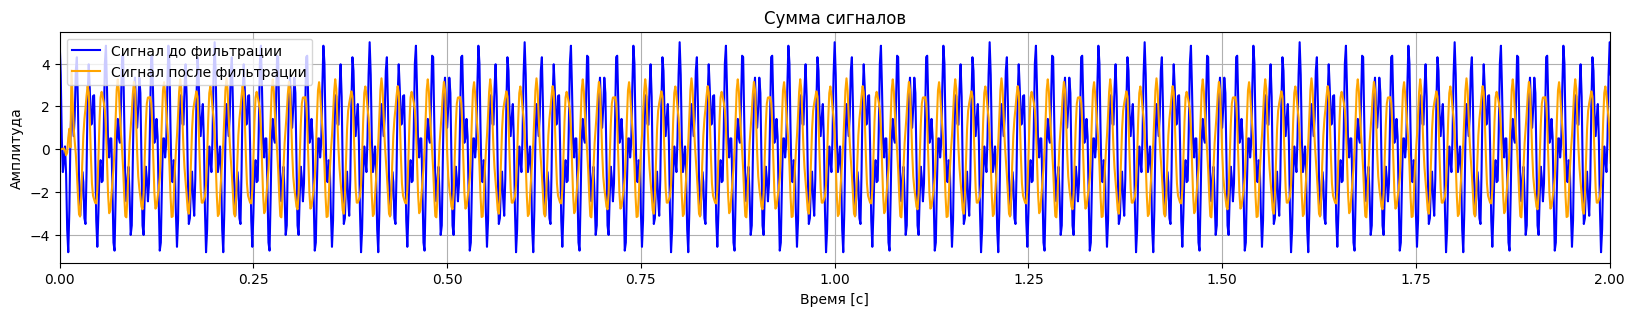

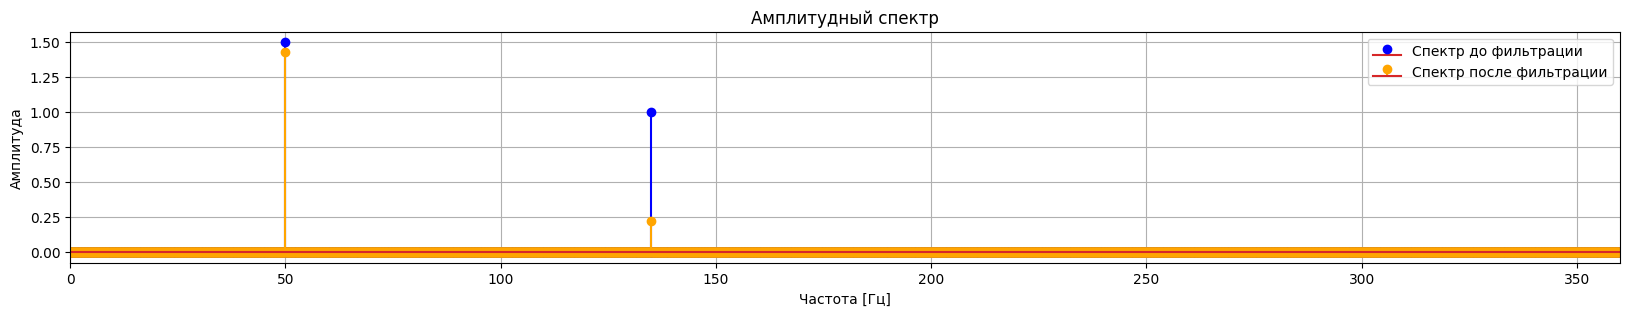

In [619]:
from scipy import fftpack

# Оси времени и частоты
t = np.linspace(0, N * T, N, endpoint = False)
f = fftpack.fftfreq(N) * fs

plt.figure(figsize=[20, 3])
plt.plot(t, xsum, 'b', label='Сигнал до фильтрации')
plt.plot(t, xsum_fil, 'orange', label='Сигнал после фильтрации')
plt.title('Сумма сигналов')
plt.xlabel('Время [с]')
plt.ylabel('Амплитуда')
plt.xlim([0, N*T/5])
plt.grid(True)
plt.legend()

plt.figure(figsize=[20, 3])
plt.stem(f, abs(dff), 'b', label='Спектр до фильтрации')
plt.stem(f, abs(dff_fil), 'orange', label='Спектр после фильтрации')
plt.xlim([0, fn])
plt.grid(True)
plt.xlabel('Частота [Гц]')
plt.ylabel('Амплитуда')
# plt.set_xlim(-fs/2, fs/2)
plt.title('Амплитудный спектр')
plt.legend()
plt.show()

# plt.figure(figsize=[20, 3])
# plt.plot(t, xsum_fil)
# plt.title('Сумма сигналов (до фильтрации)')
# plt.xlabel('Время [с]')
# plt.ylabel('Амплитуда')
# plt.xlim([0, N*T/5])
# plt.grid(True)

# plt.figure(figsize=[20, 3])
# plt.stem(f, abs(dff_fil))
# plt.xlim([0, fn])
# plt.grid(True)
# plt.xlabel('Частота [Гц]')
# plt.ylabel('Амплитуда')
# # plt.set_xlim(-fs/2, fs/2)
# plt.title('Амплитудный спектр (после фильтрации)')
# plt.show()


## Доп. задание
>В задании 2.2 выполнить фильтрацию в частотной области, используя БПФ, ОДПФ их
свойства. Убедиться в идентичности результатов при фильтрации во временной и в
частотной областях.

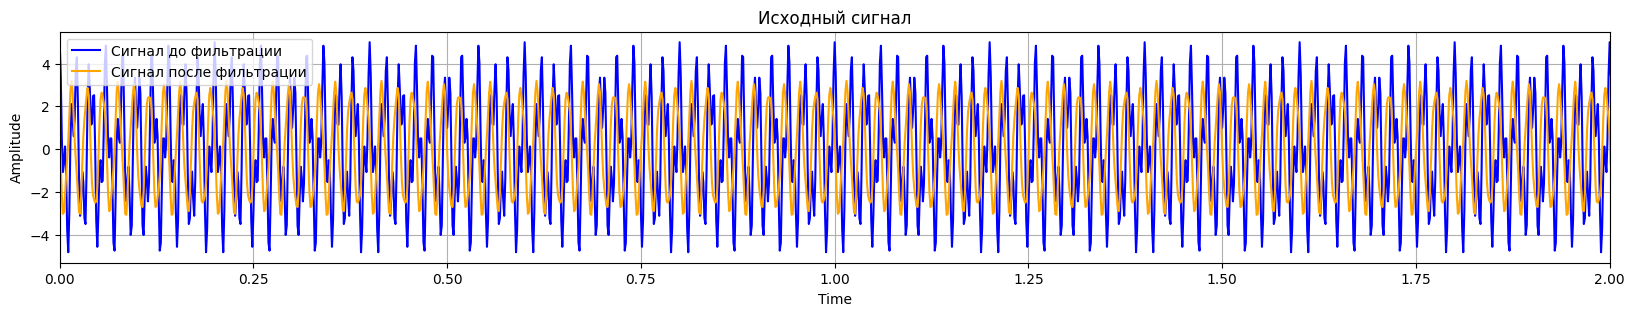

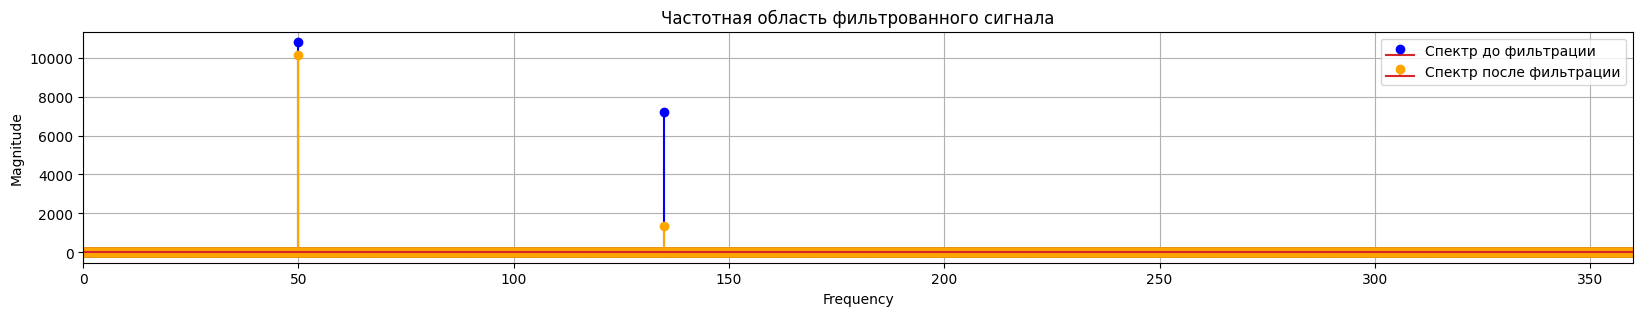

In [627]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from scipy.signal import firwin2

# Характеристики фильтра
# fs = 720
# f0 = 150
# Fpass = 170
# Fstop = 100
# Nf = 23
# Задаем желаемый уровень амплитуды для каждой полосы частот

# Расчет коэффициентов фильтра
bands = [0, Fstop-0.1, Fstop, Fpass, Fpass+0.1, (fs/2)-0.1, fs/2]
gains = [1, 1, 0, 0, 1, 1, 0]
# taps = firwin2(Nf, bands, gains, fs=fs)
taps = firwin2(Nf, bands, gains, fs=fs, window='blackman')

# Задаем желаемый уровень амплитуды для каждой полосы частот

# Генерация случайного сигнала
# N = 1000
# t = np.linspace(0, N/fs, N, endpoint=False)
# signal = np.sin(2 * np.pi * f0 * t) + np.random.normal(0, 1, N)

# Применение фильтра в частотной области
freq_signal = fft(signal)
freq_taps = fft(taps, N)
filtered_freq_signal = freq_signal * freq_taps

# Обратное преобразование Фурье
filtered_signal = ifft(filtered_freq_signal).real

# Построение графиков
plt.figure(figsize=[20, 3])
plt.plot(t, signal, 'b', label='Сигнал до фильтрации')
plt.plot(t, filtered_signal, 'orange', label='Сигнал после фильтрации')
plt.title('Исходный сигнал')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim([0, 2])
plt.grid()


plt.figure(figsize=[20, 3])
plt.stem(np.fft.fftfreq(N, 1/fs), np.abs(freq_signal), 'b', label='Спектр до фильтрации')
plt.stem(np.fft.fftfreq(N, 1/fs), np.abs(filtered_freq_signal), 'orange', label='Спектр после фильтрации')
plt.title('Частотная область фильтрованного сигнала')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid()
plt.legend()
# plt.tight_layout()
plt.xlim([0, fn])

plt.show()

# Пробный код

In [621]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.signal import firwin2, freqz, firwin

# fs = 720  # Частота дискретизации
# f0 = 150  # Основная частота
# Fpass = 170  # Частота пропускания
# Fstop = 100  # Частота заграждения
# order = 22  # Порядок фильтра

# # Определяем точки разделения частот для режекторного фильтра
# freqs = [0, Fstop, Fpass, fs/2 - 1, fs/2]
# # freqs =
# # Задаем желаемый уровень амплитуды для каждой полосы частот
# gains = [1, 0, 0, 1, 0]

# # Создаем фильтр с помощью функции firwin2
# # taps = firwin2(order, freqs, gains, fs=fs)
# taps = firwin2(order+1, freqs, gains, fs=fs )

# # Выводим коэффициенты фильтра
# print('Коэффициенты фильтра:')
# print(taps)

# # Рисуем частотную характеристику фильтра
# w, h = freqz(taps, a=1)
# plt.plot(fs * 0.5 / np.pi * w, np.abs(h))
# plt.axvline(x=Fstop, color='r', linestyle='--', label='Частота заграждения')
# plt.axvline(x=Fpass, color='g', linestyle='--', label='Частота пропускания')
# plt.title('Частотная характеристика режекторного фильтра')
# plt.xlabel('Частота [Гц]')
# plt.ylabel('Уровень амплитуды')
# plt.legend()
# plt.grid()
# plt.show()

In [622]:
# import numpy as np
# import matplotlib.pyplot as plt

# signal = xsum.copy()

# # Вычисление БПФ входного сигнала
# signal_fft = fft(signal)


# # Определение фильтра в частотной области (фильтр низких частот)
# # freq = np.fft.fftfreq(len(signal))
# freq = fftpack.fftfreq(N) * fs
# # filter_mask = np.abs(freq) < 5  # Сохраняем частоты ниже 5 Гц

# filter_gains = []
# for i in range(len(freq)):
#   if(freq[i] < Fstop or freq[i] >= Fpass and freq[i] <= fn):
#     filter_gains.append(freq[i])
#   else:
#     filter_gains.append(0)


# # Применение фильтра в частотной области
# filtered_fft = signal_fft * filter_gains

# # Обратное преобразование Фурье для получения отфильтрованного сигнала
# filtered_signal = np.fft.ifft(filtered_fft)

# # Визуализация результатов
# plt.figure(figsize=[20, 3])

# plt.plot(t, signal, 'b', label='Сигнал до фильтрации')
# # plt.plot(t, filtered_signal.real, 'orange', label='Сигнал после фильтрации')
# plt.title('Сумма сигналов')
# plt.xlabel('Время [с]')
# plt.ylabel('Амплитуда')
# plt.xlim([0, N*T/5])
# plt.grid(True)
# plt.legend()

# plt.figure(figsize=[20, 3])
# plt.stem(freq, np.abs(signal_fft), 'b', label='Спектр до фильтрации')
# plt.stem(freq, filtered_fft, 'orange', label='Спектр после фильтрации')
# plt.xlim([0, fn])
# plt.grid(True)
# plt.xlabel('Частота [Гц]')
# plt.ylabel('Амплитуда')
# # plt.set_xlim(-fs/2, fs/2)
# plt.title('Амплитудный спектр')
# plt.legend()
# # plt.tight_layout()
# plt.show()

In [623]:
# import matplotlib.pyplot as plt
# import numpy as np

# x = np.linspace(0, 1, 15)
# y = np.random.random_sample(15)
# xerr = np.random.random_sample(15) / 10
# yerr = np.random.random_sample(15) / 10

# plt.figure()
# plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='o-', ecolor='red')
# plt.show()